Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random


Reading dataset

In [9]:
#c101C6
#rc101
#r101
data = []
with open('dataset/c101C6.txt', 'r') as datafile:
    for line in datafile:
        line = line.strip().split('\n')
        data.append(line)
numpy_data = np.array(data)
numpy_data = numpy_data[1:]
splited_data = [line[0].split() for line in numpy_data]
splited_data


[['1', '40.00', '50.00', '0.00', '0.00', '1236.00', '0.00'],
 ['2', '45.00', '68.00', '10.00', '912.00', '967.00', '90.00'],
 ['3', '45.00', '70.00', '30.00', '825.00', '870.00', '90.00'],
 ['4', '42.00', '66.00', '10.00', '65.00', '146.00', '90.00'],
 ['5', '42.00', '68.00', '10.00', '727.00', '782.00', '90.00'],
 ['6', '42.00', '65.00', '10.00', '15.00', '67.00', '90.00'],
 ['7', '40.00', '69.00', '20.00', '621.00', '702.00', '90.00'],
 ['8', '40.00', '66.00', '20.00', '170.00', '225.00', '90.00'],
 ['9', '38.00', '68.00', '20.00', '255.00', '324.00', '90.00'],
 ['10', '38.00', '70.00', '10.00', '534.00', '605.00', '90.00'],
 ['11', '35.00', '66.00', '10.00', '357.00', '410.00', '90.00'],
 ['12', '35.00', '69.00', '10.00', '448.00', '505.00', '90.00'],
 ['13', '25.00', '85.00', '20.00', '652.00', '721.00', '90.00'],
 ['14', '22.00', '75.00', '30.00', '30.00', '92.00', '90.00'],
 ['15', '22.00', '85.00', '10.00', '567.00', '620.00', '90.00'],
 ['16', '20.00', '80.00', '40.00', '384.00

If dataset is R and RC


In [4]:
for info in splited_data:
    info[0]=str(int(info[0])+1)
splited_data

[['2', '40.00', '50.00', '0.00', '0.00', '1236.00', '0.00'],
 ['3', '45.00', '68.00', '10.00', '912.00', '967.00', '90.00'],
 ['4', '45.00', '70.00', '30.00', '825.00', '870.00', '90.00'],
 ['5', '42.00', '66.00', '10.00', '65.00', '146.00', '90.00'],
 ['6', '42.00', '68.00', '10.00', '727.00', '782.00', '90.00'],
 ['7', '42.00', '65.00', '10.00', '15.00', '67.00', '90.00'],
 ['8', '40.00', '69.00', '20.00', '621.00', '702.00', '90.00'],
 ['9', '40.00', '66.00', '20.00', '170.00', '225.00', '90.00'],
 ['10', '38.00', '68.00', '20.00', '255.00', '324.00', '90.00'],
 ['11', '38.00', '70.00', '10.00', '534.00', '605.00', '90.00'],
 ['12', '35.00', '66.00', '10.00', '357.00', '410.00', '90.00'],
 ['13', '35.00', '69.00', '10.00', '448.00', '505.00', '90.00'],
 ['14', '25.00', '85.00', '20.00', '652.00', '721.00', '90.00'],
 ['15', '22.00', '75.00', '30.00', '30.00', '92.00', '90.00'],
 ['16', '22.00', '85.00', '10.00', '567.00', '620.00', '90.00'],
 ['17', '20.00', '80.00', '40.00', '384.0

ANT class 

In [10]:
class Ant:
    def __init__(self,data,capacity,q0):
        self.data=data
        self.travel=()
        self.capacity=capacity
        self.time_window={}
        self.pheromon={}
        self.current_point=1
        self.q0=q0
        self.cordination=[]
        self.distance_matrix={}
        self.next_node=1
        self.intensity={}
        self.time_window={}
        self.alpha=1
        self.beta=4
        self.gama=3
        self.visited_list=[1]
        self.candidate_list=[]
        self.probability_q0={}
        self.probability_q={}
        self.probability_q_norm={}
        self.minimum_capacity=0
        self.capcities={}
        self.travel_distance=0
        self.rho=0.6
        self.pheromon_numbers={}
        self.Q=1
        self.service_time=0.00
        self.serv_list=[]

   
    def customer_cord(self):
        for i in range(len(self.data)):
            cords=[float(self.data[i][1]),float(self.data[i][2])]
            self.cordination.append(cords)
        return self.cordination
    def euclidean_distance(self):
        for i in range(len(self.cordination)):
            for j in range(len(self.cordination)):
                distance=math.sqrt(((self.cordination[i][0]-self.cordination[j][0])**2)+((self.cordination[i][1]-self.cordination[j][1])**2))
                self.distance_matrix[i+1,j+1]=distance
                try:
                    self.intensity[i+1,j+1]=1/distance
                except:
                    self.intensity[i+1,j+1]=-99999999
        return self.distance_matrix,self.intensity
    def width_window(self):    
        for i in self.data:
            self.time_window[i[0]]=float(i[5])-float(i[4])
        return self.time_window
    def path_pheromon(self):
        for node_i in self.data:
            for node_j in self.data:
                self.pheromon[int(node_i[0]),int(node_j[0])]=1
        return self.pheromon
    def number_pheromon(self):
        for node_i in self.data:
            for node_j in self.data:
                self.pheromon_numbers[int(node_i[0]),int(node_j[0])]=0
        return self.pheromon_numbers
    def make_candidate_list(self):
        self.candidate_list=[]
        for node in self.data:
            if int(node[0]) not in self.visited_list:
                self.candidate_list.append(int(node[0]))
        return self.candidate_list
    def choose_next_node(self):
        if len(self.candidate_list)==0:
            self.next_node=1
            return self.next_node
        elif len(self.candidate_list)==1:
            
            self.next_node=self.candidate_list[0]
            if float(self.data[int(self.next_node)][3])<self.capacity:
                
                return self.next_node
            else:
                self.next_node=1
                return self.next_node
                
        else:
            next_node=0
            self.probability_q0={}
            self.probability_q={}
            self.probability_q_norm={}
            for node in self.candidate_list:
                self.probability_q0[self.current_point,node]=(self.pheromon[self.current_point,node]**self.alpha)*(self.intensity[self.current_point,node]**self.beta)*((1/(self.time_window[str(self.current_point)])**self.gama))
            for node in self.candidate_list:
                self.probability_q[self.current_point,node]=(self.pheromon[self.current_point,node]**self.alpha)*(self.intensity[self.current_point,node]**self.beta)*((1/(self.time_window[str(self.current_point)])**self.gama))/ max(self.probability_q0.values())
# نرمالایز کردن مقادیر
            def softmax_normalize(dictionary):
                values = np.array(list(dictionary.values()), dtype=np.float64)
                exp_values = np.exp(values - np.max(values))  # جلوگیری از مشکل از دست رفتن دقت
                normalized_values = exp_values / np.sum(exp_values)
                normalized_dict = dict(zip(dictionary.keys(), normalized_values))
                return normalized_dict
            self.probability_q_norm =softmax_normalize(self.probability_q)
            self.capcities={}
            for node in self.candidate_list:
                self.capcities[node]=float(self.data[node-1][3])
            q=random.random()
            i=0
            if q<=self.q0:
                sorted_value_q0=sorted(self.probability_q0.values(),reverse=True)
                for key,value in self.probability_q0.items():
                    if value==sorted_value_q0[i]:
                        if float(self.data[key[1]-1][3])<=self.capacity and self.service_time+float(self.data[key[1]-1][6])<=float(self.data[0][5]) :
                            next_node=key[1]
                            self.next_node=next_node
                            return self.next_node
                        else:
                            flag=0
                            for key,value in self.capcities.items():
                                flag+=1
                                if value<=self.capacity and self.service_time+float(self.data[key-1][6])<=float(self.data[0][5]):
                                    self.next_node=key
                                elif flag==len(self.capcities)-1:
                                    self.next_node=None
                                else:
                                    pass
                            return self.next_node    
            else:
                def roulette_wheel_selection(values, probabilities):
                    selected_key = random.choices(list(values), weights=list(probabilities), k=1)[0]
                    return selected_key
                j=0
                for item in self.probability_q_norm:
                    selected_key = roulette_wheel_selection(self.probability_q_norm.keys(), self.probability_q_norm.values())
                    if float(self.data[selected_key[1]-1][3])<=self.capacity and self.service_time+float(self.data[selected_key[1]-1][6])<=float(self.data[0][5]):
                        next_node=selected_key[1]
                        self.next_node=next_node
                        return self.next_node
                    else:
                        continue
                self.next_node=None
                return self.next_node
    def cal_minimum_capacity(self):
        demands=[]
        for node in self.data[1:]:
            demands.append(float(node[3]))
            self.minimum_capacity=min(demands)
        return self.minimum_capacity
    def move(self):
        if self.next_node==None:
            self.next_node=1
            self.travel=(self.current_point,1)
        else:
            self.visited_list.append(self.next_node)
            self.travel=(self.current_point,self.next_node)
            if self.travel[0]==1:
                self.service_time=self.service_time+float(self.data[self.travel[1]-1][4])+float(self.data[self.travel[1]-1][6])
            else:
                self.service_time=self.service_time+float(self.data[self.travel[1]-1][6])

            self.serv_list.append(self.service_time)
            self.capacity=self.capacity-float(self.data[self.next_node-1][3])
            self.current_point=self.next_node
        self.travel_distance+=self.distance_matrix[self.travel]
        return self.travel
    def update_rho(self):
        self.rho=0.9*self.rho
        return self.rho
    def update_pheromon_number(self,ants_travels):
        for travel in ants_travels:
            self.pheromon_numbers[travel]=self.pheromon_numbers[travel]+(self.Q/len(ants_travels))
        return self.pheromon_numbers
    def update_pheromon(self,ants_travels):
        for travel in ants_travels:
            self.pheromon[travel]=self.pheromon[travel]+((1-self.rho)*(self.pheromon[travel])+(self.rho*self.pheromon_numbers[travel]))
        return self.pheromon
     



        
    
   
        
        
        
        
  
        
        
    
    
    
    

MUTATION

In [11]:
class Mutation:
   
    def __init__(self,ants_route):
        self.ants_route=ants_route
        self.distance=0
     
    def swap_mutation(self):
        half=int(len(self.ants_route)/2)
        while True:
            route_i=random.randint(0,half-1)
            route_j=random.randint(half,len(self.ants_route)-1)
            node_i=random.randint(0,len(self.ants_route[route_i])-1)
            node_j=random.randint(0,len(self.ants_route[route_j])-1)
            if splited_data[node_i-1][3]==splited_data[node_j-1][3]:
                fake=self.ants_route[route_i][node_i]
                self.ants_route[route_i][node_i]=self.ants_route[route_j][node_j]
                self.ants_route[route_j][node_j]=fake
                break
            else:
                continue
        return self.ants_route


   
    def mutated_distance(self,distance_matrix,travel):
        self.distance+=distance_matrix[travel]
        return self.distance
    


            

        

IMPLEMENTATON

In [13]:
ants_travels={}
ants_route={}
travels=[]
path=[1]
colony=Ant(splited_data,200.00,0.9)
colony.customer_cord()
colony.euclidean_distance()
colony.width_window()
colony.path_pheromon()
colony.number_pheromon()
i=0
while True:
    colony.make_candidate_list()
    colony.choose_next_node()
    colony.cal_minimum_capacity()
    colony.move()
    path.append(colony.next_node)
    travel=colony.travel
    travels.append(travel)
    if travel[1]==1:
        if travel==(1,1):
            break
        else:
            ants_travels[i]=travels
            colony.update_rho()
            colony.update_pheromon_number(ants_travels[i])
            colony.update_pheromon(ants_travels[i])
            ants_route[i]=path
            path=[1]
            travels=[]
            i=i+1
            colony.current_point=1
            colony.capacity=200.00
            colony.service_time=0

ants_route
   

{0: [1, 21, 91, 90, 89, 86, 85, 84, 83, 87, 88, 92, 99, 1],
 1: [1, 22, 23, 24, 1],
 2: [1, 68, 66, 64, 63, 67, 70, 69, 65, 62, 73, 37, 35, 101, 1],
 3: [1, 25, 26, 28, 29, 27, 31, 30, 33, 34, 32, 1],
 4: [1, 6, 4, 5, 7, 9, 16, 17, 15, 13, 100, 97, 1],
 5: [1, 46, 45, 43, 42, 41, 44, 48, 1],
 6: [1, 76, 2, 1],
 7: [1, 8, 71, 74, 78, 80, 79, 77, 72, 82, 81, 98, 1],
 8: [1, 11, 12, 60, 58, 56, 55, 54, 57, 59, 1],
 9: [1, 50, 53, 1],
 10: [1, 75, 47, 49, 51, 52, 36, 38, 39, 40, 1],
 11: [1, 18, 19, 20, 14, 10, 3, 96, 95, 94, 1],
 12: [1, 93, 61, 1]}

Draw coordinate diagram

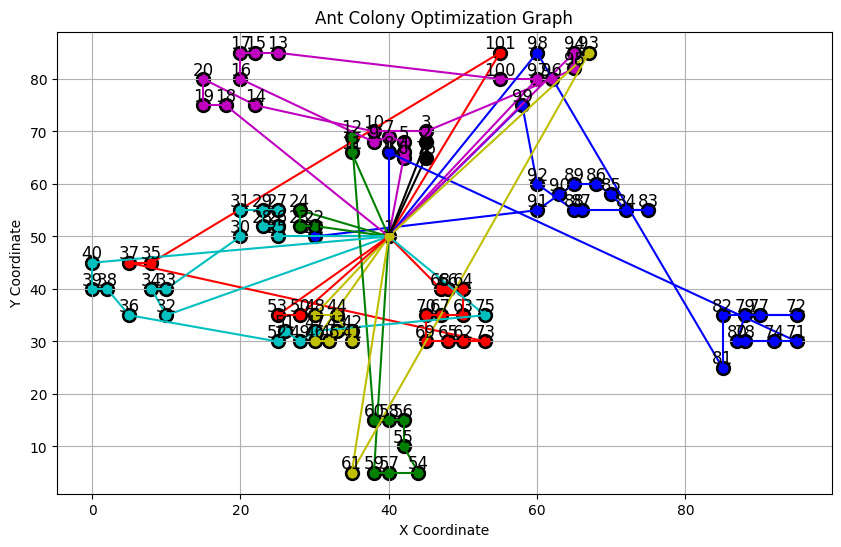

In [14]:



coordinates={}
for i,j in enumerate(colony.cordination):
    coordinates[i+1]=j
data=ants_route
def draw_graph(coordinates, data):
    plt.figure(figsize=(10, 6))  
    plt.grid(True)

    # رسم یال‌های گراف
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # رنگ‌های متفاوت برای هر مسیر
    color_index = 0
    for path in data.values():
        for i in range(len(path) - 1):
            x_values = [coordinates[path[i]][0], coordinates[path[i+1]][0]]  # مختصات x
            y_values = [coordinates[path[i]][1], coordinates[path[i+1]][1]]  # مختصات y
            plt.plot(x_values, y_values, marker='o', color=colors[color_index])
        color_index = (color_index + 1) % len(colors)  # تغییر رنگ برای مسیر بعدی

    # رسم نقاط گراف
    for node, coords in coordinates.items():
        plt.scatter(coords[0], coords[1], color='k', s=100)
        plt.text(coords[0], coords[1], str(node), fontsize=12, ha='center', va='bottom')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Ant Colony Optimization Graph')
    plt.show()

# فراخوانی تابع برای رسم گراف
draw_graph(coordinates, data)

IMPLEMENTATON MUTATION

In [18]:
results={}
result_ant_numb={}
swap_mutated_result={}

for j in range(50):
    ants_number=0
    ants_travels={}
    ants_route={}
    travels=[]
    path=[1]
    colony=Ant(splited_data,200.00,0.9)
    colony.customer_cord()
    colony.euclidean_distance()
    colony.width_window()
    colony.path_pheromon()
    colony.number_pheromon()
    i=0
    while True:
        colony.make_candidate_list()
        colony.choose_next_node()
        colony.cal_minimum_capacity()
        colony.move()
        path.append(colony.next_node)
        travel=colony.travel
        travels.append(travel)
        if travel[1]==1:
            if travel==(1,1):
                break
            else:
                ants_travels[i]=travels
                colony.update_rho()
                colony.update_pheromon_number(ants_travels[i])
                colony.update_pheromon(ants_travels[i])
                ants_route[i]=path
                path=[1]
                travels=[]
                i=i+1
                colony.current_point=1
                colony.capacity=200.00
                colony.service_time=0
                ants_number+=1
    
# #######Mutated################################

    mutated_ants_route={}
    ant_travel=()
    ####swap mute###
    mutated_route=Mutation(ants_route)
   
    mutated_ants_route=mutated_route.swap_mutation()
    for key,value in mutated_ants_route.items():
        for i in range(len(value)-1):
            ant_travel=(value[i],value[i+1])
            mutated_route.mutated_distance(colony.distance_matrix,ant_travel)
    swap_mutated_result[j]=mutated_route.distance
    results[j]=colony.travel_distance
    result_ant_numb[j]=(ants_number,mutated_route.distance)
print('non mutation result:')
print(results)
print('swap mutation result:')
print(swap_mutated_result)

result_ant_numb

    
 



non mutation result:
{0: 1316.2796765556543, 1: 1589.0486303234547, 2: 1475.8148834741899, 3: 1506.0026111643433, 4: 1573.0267509764255, 5: 1622.8471841782703, 6: 1633.9207708865117, 7: 1393.4889764812021, 8: 1764.1887656121844, 9: 1359.406697689586, 10: 1550.5040763117063, 11: 1494.056150570713, 12: 1468.837182449104, 13: 1445.0858026670792, 14: 1534.0012412375947, 15: 1485.0458315120031, 16: 1583.6050189278512, 17: 1526.5474059641167, 18: 1498.79846140829, 19: 1262.230382385539, 20: 1623.843904554879, 21: 1791.6562691441657, 22: 1589.6449371265098, 23: 1687.1101378492383, 24: 1462.2232441564217, 25: 1749.9440390391978, 26: 1549.8080991503884, 27: 1494.186351573685, 28: 1569.1191249816309, 29: 1442.4248192064335, 30: 1543.864460000673, 31: 1741.4213408681073, 32: 1768.7406083655046, 33: 1386.626045748008, 34: 1377.0846600108755, 35: 1513.2956928949363, 36: 1640.891899119743, 37: 1591.4635559568205, 38: 1375.3056066231286, 39: 1420.1364663540542, 40: 1285.1545862032724, 41: 1624.445179

{0: (12, 1497.4750461562155),
 1: (11, 1616.9587054598423),
 2: (12, 1563.3217770223303),
 3: (12, 1681.0948709876313),
 4: (12, 1724.3202304261074),
 5: (10, 1664.1711179449985),
 6: (12, 1651.0553703113903),
 7: (12, 1465.9126505840136),
 8: (14, 1867.475355675615),
 9: (13, 1511.5907101252399),
 10: (12, 1587.734127290534),
 11: (10, 1588.1845554257009),
 12: (12, 1625.566378783257),
 13: (12, 1525.2419721576828),
 14: (12, 1534.0012412375947),
 15: (13, 1472.5732617006227),
 16: (12, 1608.7254592676156),
 17: (11, 1684.8578012452208),
 18: (12, 1659.1126386556439),
 19: (12, 1314.7623158119093),
 20: (10, 1692.3925020886682),
 21: (13, 1791.6562691441657),
 22: (11, 1618.5808029072487),
 23: (11, 1862.005616748308),
 24: (11, 1665.262197809228),
 25: (11, 1788.6209922032974),
 26: (13, 1673.7420757530335),
 27: (11, 1581.5554308343683),
 28: (12, 1607.7678438681207),
 29: (11, 1547.694305182374),
 30: (11, 1755.9919801439607),
 31: (13, 1831.9951503041398),
 32: (12, 1785.737517874

Chart

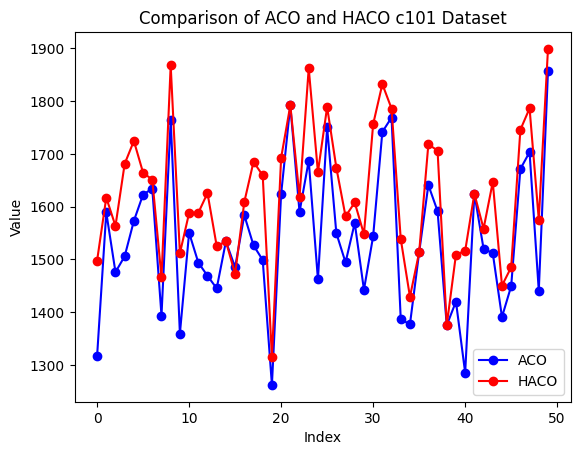

In [19]:

keys1 = list(results.keys())
values1 = list(results.values())
keys2 = list(swap_mutated_result.keys())
values2 = list(swap_mutated_result.values())

# Creating the plot
plt.plot(keys1, values1, marker='o', linestyle='-', color='b', label='ACO')
plt.plot(keys2, values2, marker='o', linestyle='-', color='r', label='HACO')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of ACO and HACO c101 Dataset')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()